# Deep Learning for Image Classification Assessment




------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [70]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [71]:
import matplotlib.pyplot as plt
import cv2

In [72]:
single_img = x_train[0]

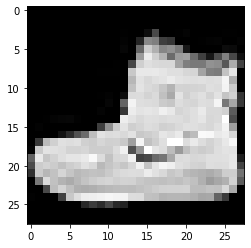

In [73]:
plt.imshow(single_img, cmap='gray')

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [99]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [75]:
x_train = x_train.reshape(60000,28,28,1)

In [76]:
x_test = x_test.reshape(10000,28,28,1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [77]:
from keras.utils.np_utils import to_categorical

In [78]:
y_cat_train = to_categorical(y_train, 10)

In [79]:
y_cat_test = to_categorical(y_test, 10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [80]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [81]:
model = Sequential()

In [82]:
model.add( Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation= 'relu'))

model.add( MaxPool2D(pool_size=(2,2)) )

model.add( Flatten() )

model.add( Dense(128, activation='relu') )
model.add( Dense(10, activation='softmax') )

model.compile(loss='categorical_crossentropy'
            , optimizer='rmsprop'
            , metrics=['accuracy'])



### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(x_train, y_cat_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5474 - accuracy: 0.8062
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2800 - accuracy: 0.8982
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2385 - accuracy: 0.9150
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2056 - accuracy: 0.9268
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1892 - accuracy: 0.9319


### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [87]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2783 - accuracy: 0.9083


[0.2782568037509918, 0.90829998254776]

In [89]:
model.metrics_names

['loss', 'accuracy']

In [94]:
from sklearn.metrics import classification_report
import numpy as np

In [95]:
predictions = np.int16(model.predict_classes(x_test))

In [96]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int16)

In [98]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.89      0.84      1000
           3       0.88      0.95      0.91      1000
           4       0.85      0.85      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.82      0.65      0.73      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

